# 1. 패키지 설치


In [13]:
!pip install factor-analyzer

# 2. 패키지 임포트

In [21]:
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. 데이터 불러오기

In [15]:
df=pd.read_csv('/content/nba2021_advanced.csv')

df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


# 4. 변수 선택 및 데이터 스케일 정규화

In [16]:
# 요인 분석할 칼럼만 선택(문자형 변수 등 제거)
df1 = df.drop(['Player', 'Pos', 'Tm', 'Age'], axis = 'columns')

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 칼럼명 결합
df_minmax = pd.DataFrame(data = df_minmax, columns = df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,0.186667,0.178404,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,0.000000,0.000000,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,0.226667,0.093897,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,0.186667,0.150235,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,0.093333,0.131455,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


# 5. 바틀렛 테스트

In [17]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_minmax)

# 카이스퀘어, p_value 확인
chi_square_value, p_value

(20174.082695114277, 0.0)

각 변수들 사이의 상관계수의 적합성을 검증하기 위하여 바틀렛 테스트를 수행한다

아웃풋 결과의
p-value가 0.05보다 작은 0.0으로 출력됐기 때문에 공통요인분석을 하기에 적합하다


# 6. KMO 검정

In [18]:
kmo_all, kmo_test = calculate_kmo(df_minmax)
kmo_test

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159217

0.7은 ‘약간 높음’ 수준이므로 준수한 수준

# 7. 전체 요인 적재 값 확인

In [19]:
fa = FactorAnalyzer(n_factors=30, rotation = None)
fa.fit(df_minmax)
ev, v = fa.get_eigenvalues()

np.round_(ev,2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

# 8. 스크리 도표 시각화

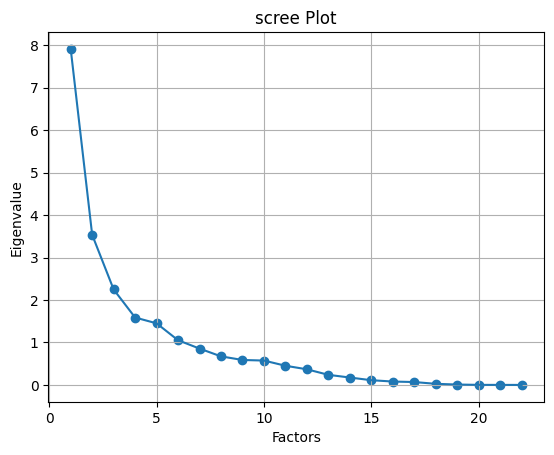

In [22]:
plt.scatter(range(1, df_minmax.shape[1]+1), ev)
plt.plot(range(1, df_minmax.shape[1]+1), ev)
plt.title('scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

4개의 요인 지점 이후 경사가 급격히 감소하기 때문에 4개 요인을 선정하는 것이 적절해보인다

# 9. 요인과 변수 간 요인 적재 값 확인

In [23]:
# 관측된 변수들로부터 4개의 인자를 추출하고,
# 결과를 해석하기 쉽게 만들기 위해 varimax 방식으로 인자들을 회전시키는 과정
fa = FactorAnalyzer(n_factors=4, rotation='varimax')

fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_, index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


상관관계는 士 1에 가
까울수록 높은 것이기 때문에

G 칼럼의 경우 2번 요인과 가장 높은 상관관계를 가지고 있는 것을 확인할 수 있다.


# 10. 요인과 변수 간 요인 적재 값 시각화



<Axes: >

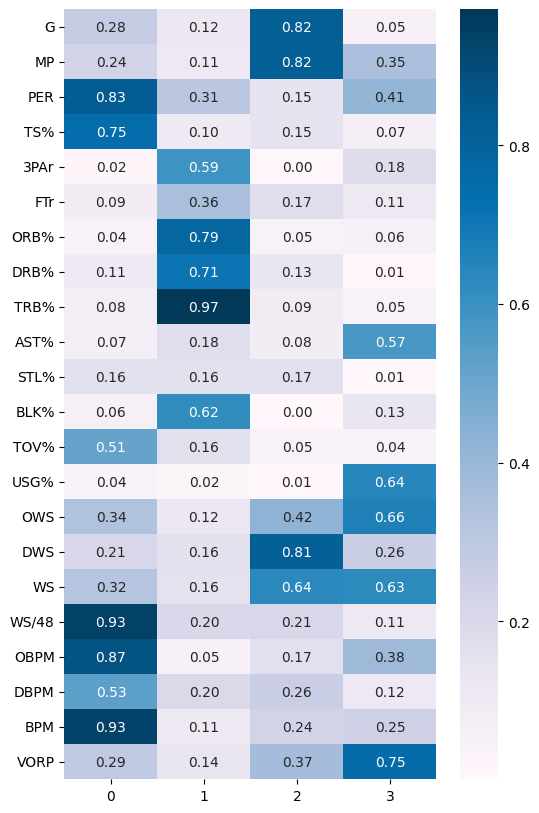

In [25]:
plt.figure(figsize = (6,10))
sns.heatmap(abs(factor_loadings), cmap='PuBu', annot = True, fmt='.2f')